In [12]:
import json

import pandas as pd
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, EmotionOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='06320980-d791-4920-834b-3c5368522608',
  password='UKVXqFnwnNnZ',
  version='2018-03-16')


### Function to Read

In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'ascii'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [3]:
text = convert_pdf_to_txt('../Bollywood-Data-master/scripts-data/JabWeMet.pdf')

In [4]:
print(type(text))
print(len(text))

<class 'str'>
155135


### Split text based on scenes

In [10]:
delimiter = 'Sc #'
text2 = text.split(delimiter)

In [11]:
print(type(text2))
print(len(text2))


<class 'list'>
88


##### Note: There are supposed to be 74 scene for JabWeMet, but ofc the delimiter has ro be something better

#### Creating a table to dump the values into

In [13]:
main_table = pd.DataFrame()


In [14]:
for i,txt in enumerate(text2):
    try:
        response = natural_language_understanding.analyze(
          text = txt,
          features=Features(
            emotion=EmotionOptions())).get_result()
        mbst = response['emotion']['document']['emotion']
        mbst['scene'] = i

        table1 = pd.DataFrame.from_dict(mbst, orient='index').squeeze()
        print(type(table1))

        main_table = main_table.append(table1)
        print(main_table)
    except:
        main_table = main_table.append({'anger':0, 'disgust':0,'fear':0, 'joy':0,'sadness':0, 'scene':i}, ignore_index=True)



<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.13222

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
      anger   disgust      fear       joy   sadness  scene
0  0.000000  0.000000  0.000000  0.000000  0.000000    0.0
0  0.154228  0.166751  0.132229  0.609211  0.513192    1.0
0  0.163032  0.102386  0.080945  0.470791  0.135077    2.0
0  0.479410  0.099710  0.154345  0.550701  0.493098    3.0
0  0.174021  0.132795  0.140106  0.567278  0.474871    4.0
0  0.139634  0.158479  0.080639  0.564451  0.457320    5.0
0  0.060572  0.054709  0.049846  0.617312  0.193287    6.0
0  0.118620  0.109121  0.094660  0.122413  0.179844    7.0
0  0.127295  0.112976  0.094553  0.139114  0.552998    8.0
0  0.097582  0.081457  0.075621  0.140005  0.539265    9.0
0  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
0  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
0  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
0  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
0  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
0  0.102653  0.08341

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

<class 'pandas.core.series.Series'>
       anger   disgust      fear       joy   sadness  scene
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.0
1   0.154228  0.166751  0.132229  0.609211  0.513192    1.0
2   0.163032  0.102386  0.080945  0.470791  0.135077    2.0
3   0.479410  0.099710  0.154345  0.550701  0.493098    3.0
4   0.174021  0.132795  0.140106  0.567278  0.474871    4.0
5   0.139634  0.158479  0.080639  0.564451  0.457320    5.0
6   0.060572  0.054709  0.049846  0.617312  0.193287    6.0
7   0.118620  0.109121  0.094660  0.122413  0.179844    7.0
8   0.127295  0.112976  0.094553  0.139114  0.552998    8.0
9   0.097582  0.081457  0.075621  0.140005  0.539265    9.0
10  0.172757  0.093036  0.144640  0.182617  0.475653   10.0
11  0.109024  0.111640  0.118868  0.488138  0.147802   11.0
12  0.168723  0.100501  0.133986  0.125150  0.196188   12.0
13  0.441700  0.112226  0.133602  0.123753  0.196003   13.0
14  0.151097  0.135229  0.510110  0.163781  0.496079   14.0
15  

In [15]:
main_table

,anger,disgust,fear,joy,sadness,scene
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.154228,0.166751,0.132229,0.609211,0.513192,1.0
2,0.163032,0.102386,0.080945,0.470791,0.135077,2.0
3,0.479410,0.099710,0.154345,0.550701,0.493098,3.0
4,0.174021,0.132795,0.140106,0.567278,0.474871,4.0
5,0.139634,0.158479,0.080639,0.564451,0.457320,5.0
6,0.060572,0.054709,0.049846,0.617312,0.193287,6.0
7,0.118620,0.109121,0.094660,0.122413,0.179844,7.0
8,0.127295,0.112976,0.094553,0.139114,0.552998,8.0
9,0.097582,0.081457,0.075621,0.140005,0.539265,9.0


In [25]:
main_table['scene'] = main_table['scene'].astype(int)
main_table = main_table.set_index('scene')

In [27]:
main_table

,anger,disgust,fear,joy,sadness
scene,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.154228,0.166751,0.132229,0.609211,0.513192
2,0.163032,0.102386,0.080945,0.470791,0.135077
3,0.479410,0.099710,0.154345,0.550701,0.493098
4,0.174021,0.132795,0.140106,0.567278,0.474871
5,0.139634,0.158479,0.080639,0.564451,0.457320
6,0.060572,0.054709,0.049846,0.617312,0.193287
7,0.118620,0.109121,0.094660,0.122413,0.179844
8,0.127295,0.112976,0.094553,0.139114,0.552998


#### Plot the graph, for each emotion(maybe)

In [28]:
emo = 'fear'

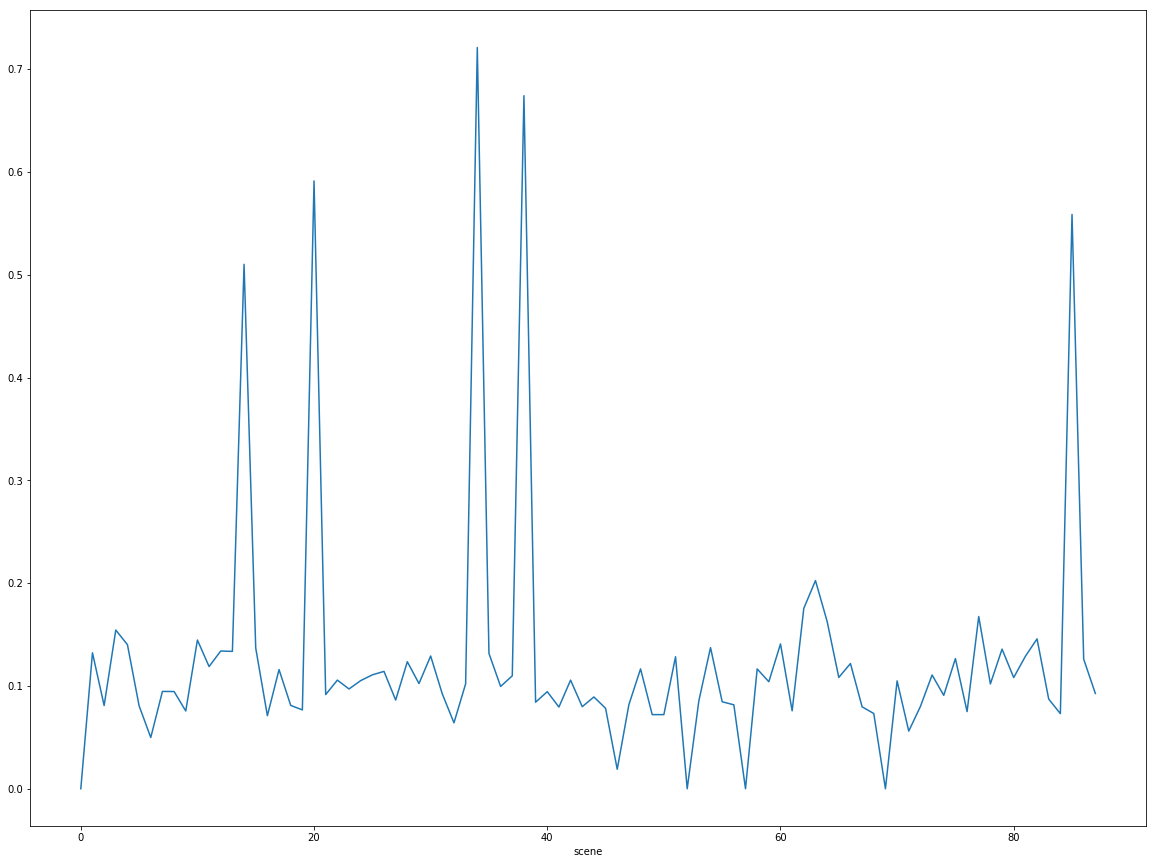

In [29]:
main_table.fear.plot(figsize = (20,15))